# Semiconductor portfolio

### Import data

In [9]:
import yahoo_import as yahoo
import pandas as pd

symbols = [
    #ASML Holding,
    "ASML",
    #Lam Research corporation
    "LRCX",
    #Applied Materials INc
    "AMAT",
    #Global foundries
    #"GFS",
    #Taiwan Semiconductor Manufacturing Company,
    "TSM",
    #Intel Corporation
    "INTC",
    #QUALCOMM Incorporated (QCOM)
    "QCOM",
    #Broadcom Inc
    "AVGO",
    #Advanced Micro Devices, Inc.
    "AMD"
]

yahoo.download_portfolio_data(symbols)

In [15]:
df_semi = pd.DataFrame()
df_semi.index = symbols
#Make it equally weighted
df_semi["weights"] = [1/len(symbols) for s in symbols]

yahoo.save_portfolio(df_semi, "semiconductors")
yahoo.download_portfolio_info(symbols, ["marketCap"], "semiconductors")

downloading symbol ASML
downloading symbol LRCX
downloading symbol AMAT
downloading symbol TSM
downloading symbol INTC
downloading symbol QCOM
downloading symbol AVGO
downloading symbol AMD


### Read Data

In [11]:
import edhec_risk_kit as erk

portfolio_info = yahoo.read_portfolio("semiconductors")
portfolio_returns = yahoo.read_portfolio_data(portfolio_info)
portfolio_market_caps = erk.get_market_caps(portfolio_returns, portfolio_info, normalized=True)


<AxesSubplot:xlabel='Date'>

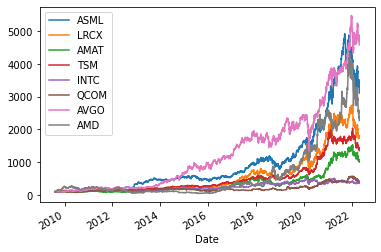

In [12]:
erk.compound_returns(portfolio_returns, 100).plot()

In [14]:
portfolio_returns_monthly = erk.resample_returns(portfolio_returns)
erk.summary_stats(portfolio_returns_monthly)

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
ASML,0.309501,0.298781,0.910293,0.538984,5.165853,0.137862,0.097738,-0.325498
LRCX,0.250206,0.313525,0.683284,0.062534,3.026893,0.157564,0.123939,-0.439110
AMAT,0.198235,0.320071,0.511226,0.352553,3.715134,0.144792,0.121402,-0.424154
TSM,0.226598,0.245637,0.778791,0.706505,6.823362,0.122647,0.076376,-0.248027
INTC,0.103496,0.228989,0.312096,-0.254166,3.177809,0.132476,0.102393,-0.295271
QCOM,0.115610,0.336404,0.247304,1.154653,7.568175,0.161821,0.102536,-0.408995
AVGO,0.349843,0.282215,1.102960,0.136816,3.102962,0.127592,0.101687,-0.236978
AMD,0.277524,0.578715,0.415537,0.304429,3.203953,0.285598,0.224443,-0.822314
